In [1]:
pip install -q pandas numpy seaborn matplotlib plotly nbformat 


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat

In [3]:
datamangas = pd.read_csv('./archive/best-selling-manga.csv')

In [4]:
print(datamangas.head())

                    Manga series                      Author(s)   Publisher  \
0                      One Piece                   Eiichiro Oda    Shueisha   
1                       Golgo 13  Takao Saito, Saito Production  Shogakukan   
2  Case Closed / Detective Conan                   Gosho Aoyama  Shogakukan   
3                    Dragon Ball                 Akira Toriyama    Shueisha   
4                       Doraemon                Fujiko F. Fujio  Shogakukan   

  Demographic  No. of collected volumes    Serialized  \
0      Shōnen                       104  1997–present   
1      Seinen                       207  1968–present   
2      Shōnen                       102  1994–present   
3      Shōnen                        42     1984–1995   
4    Children                        45     1969–1996   

   Approximate sales in million(s)  Average sales per volume in million(s)  
0                            516.6                                    4.97  
1                           

In [5]:
# Agrupar os dados pela coluna 'Demographic' e calcular a média das vendas
dados_agregados = datamangas.groupby('Demographic').agg({
    'Approximate sales in million(s)': 'mean',
    'Average sales per volume in million(s)': 'mean'
}).reset_index()

# Visualizar os dados agregados
print("Dados agregados (média das vendas por gênero):")
print(dados_agregados)

Dados agregados (média das vendas por gênero):
          Demographic  Approximate sales in million(s)  \
0            Children                        80.300000   
1               Josei                        33.500000   
2              Seinen                        39.826600   
3               Shōjo                        31.147619   
4         Shōjo/Josei                        27.000000   
5              Shōnen                        58.131683   
6       Shōnen/Seinen                        75.000000   
7  Shōnen/shōjo/Josei                        25.000000   
8                   —                        86.000000   

   Average sales per volume in million(s)  
0                                1.552500  
1                                1.125000  
2                                0.968600  
3                                1.292857  
4                                0.330000  
5                                1.628515  
6                                0.955000  
7                   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


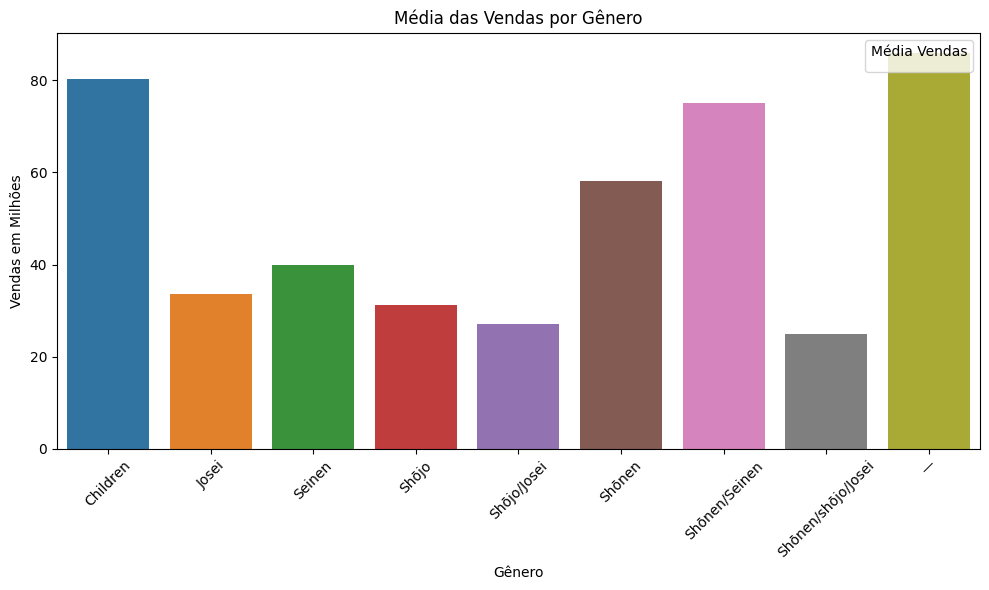

In [6]:
# Molde do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico de barra
sns.barplot(ax=ax, data=dados_agregados, x='Demographic', y='Approximate sales in million(s)', 
            hue='Demographic', dodge=False)
plt.title('Média das Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas em Milhões')
plt.xticks(rotation=45)
plt.legend(title='Média Vendas', loc='upper right')
plt.tight_layout()
plt.show()

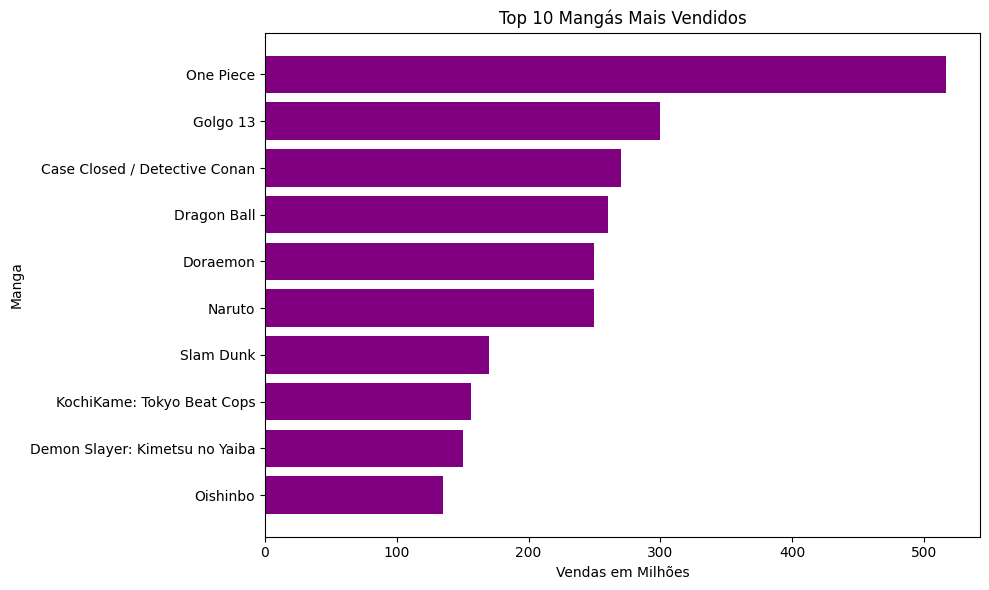

In [7]:
# Ordenar os dados pelos mais vendidos
dados_ordenados = datamangas.sort_values(by='Approximate sales in million(s)', ascending=False).head(10)

# Configurar o estilo do gráfico
plt.figure(figsize=(10, 6))
plt.barh(dados_ordenados['Manga series'], dados_ordenados['Approximate sales in million(s)'], color='purple')
plt.xlabel('Vendas em Milhões')
plt.ylabel('Manga')
plt.title('Top 10 Mangás Mais Vendidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [9]:
# Gráfico de barras interativo
fig = px.bar(dados_agregados, x='Demographic', y='Approximate sales in million(s)', 
             title='Vendas por Gênero', labels={'Approximate sales in million(s)': 'Vendas em Milhões'})
fig.show()

In [8]:
# Gráfico de dispersão interativo
fig = px.scatter(datamangas, x='Average sales per volume in million(s)', y='Approximate sales in million(s)', 
                 hover_name='Manga series', title='Comparação de Vendas por Volume e Vendas Totais')
fig.show()